# Sales Report Analysis

**Importing Libraries**

In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time,os
import pandas as pd
import matplotlib.pyplot as plt

**Setting Up Driver**

In [7]:
driver_path = 'C:/Users/U6074533/OneDrive - Clarivate Analytics/Desktop/chromedriver-win64/chromedriver.exe'
service = Service(executable_path=driver_path)
driver = webdriver.Chrome(service=service)

**Automating Downloads**

In [8]:
try:
    driver.maximize_window()
    driver.get('https://google.com')
    
    search = driver.find_element(By.ID,"APjFqb").send_keys('Github.com')
    search_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.NAME, 'btnK'))).click()

    git_link = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, 'github'))).click()
    git_box = driver.find_element(by='xpath', value='/html/body/div[1]/div[1]/header/div/div[2]/div/div/qbsearch-input/div[1]/button/span').click()

    git_search = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.ID, 'query-builder-test')))
    git_search.send_keys('Pandas-Data-Science-Tasks')
    time.sleep(1)
    git_search.submit()

    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.PARTIAL_LINK_TEXT, 'KeithGalli'))).click()
    time.sleep(2)

    driver.find_element(by='xpath',value='//*[@id="repo-content-pjax-container"]/div/div/div[2]/div[1]/div[2]/div[3]/div[1]/div[3]/div[2]/span/a').click()
    time.sleep(1)

    driver.find_element(by='xpath',value='//*[@id="folder-row-2"]/td[2]/div/div/h3/div/a').click()
    time.sleep(2)

    months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

    for month in months:
        file = pd.read_csv(f"https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv")

        df = pd.DataFrame(file)
        loc = "C:/Users/U6074533/OneDrive - Clarivate Analytics/Desktop/Project/download/"
        filename = f'{loc}{month}.csv'
        df.to_csv(filename,index=False)

except Exception as e:
    print(f"An error occurred: {str(e)}")

driver.quit()

**Merging the Each month report**

In [9]:

path="C:/Users/U6074533/OneDrive - Clarivate Analytics/Desktop/Project/download"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv("single_file.csv", index=False)
all_data = pd.read_csv("single_file.csv")

print(all_data.head())

  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
1      NaN                         NaN              NaN        NaN   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
1             NaN                                   NaN  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  


**Cleaning The Data**

In [10]:
nan_df = all_data[all_data.isna().any(axis=1)]
print(nan_df.head())
all_data = all_data.dropna(how='all')
print(all_data.head())
all_data = all_data[all_data['Order Date'].str[0:2]!='Or'] 

     Order ID Product Quantity Ordered Price Each Order Date Purchase Address
1         NaN     NaN              NaN        NaN        NaN              NaN
356       NaN     NaN              NaN        NaN        NaN              NaN
735       NaN     NaN              NaN        NaN        NaN              NaN
1433      NaN     NaN              NaN        NaN        NaN              NaN
1553      NaN     NaN              NaN        NaN        NaN              NaN
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 750

**Correcting the column**

In [11]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])


**Adding Month Column**

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

print(all_data.head())

all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month

print(all_data.head())

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4  


C:\Users\U6074533\AppData\Local\Temp\ipykernel_16156\1065087171.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month


  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month 2  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4  


**Adding the City Column**

In [13]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
print(all_data.head()) 

  Order ID                     Product  Quantity Ordered  Price Each  \
0   176558        USB-C Charging Cable                 2       11.95   
2   176559  Bose SoundSport Headphones                 1       99.99   
3   176560                Google Phone                 1      600.00   
4   176560            Wired Headphones                 1       11.99   
5   176561            Wired Headphones                 1       11.99   

       Order Date                      Purchase Address  Month  Month 2  \
0  04/19/19 08:46          917 1st St, Dallas, TX 75001      4        4   
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215      4        4   
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001      4        4   
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001      4        4   

                City  
0       Dallas  (TX)  
2       Boston  (MA)  
3  Los Angeles  (CA)  
4  Los Angeles  (CA)  
5

**Sorting the Data**

In [14]:
all_data.sort_values(["Product", "Order Date", "Month"],
                    axis=0,
                    ascending=[True, True, True],
                    inplace=True)

print(all_data.head())

      Order ID       Product  Quantity Ordered  Price Each      Order Date  \
76787   150038  20in Monitor                 1      109.99  01/01/19 12:50   
68465   142112  20in Monitor                 1      109.99  01/01/19 13:51   
71369   144857  20in Monitor                 1      109.99  01/01/19 14:29   
67971   141647  20in Monitor                 1      109.99  01/01/19 14:36   
35749   300759  20in Monitor                 1      109.99  01/01/20 00:14   

                       Purchase Address  Month  Month 2           City  
76787     191 13th St, Dallas, TX 75001      1        1   Dallas  (TX)  
68465      625 Elm St, Boston, MA 02215      1        1   Boston  (MA)  
71369     654 6th St, Atlanta, GA 30301      1        1  Atlanta  (GA)  
67971  434 Sunset St, Atlanta, GA 30301      1        1  Atlanta  (GA)  
35749      193 5th St, Austin, TX 73301      1        1   Austin  (TX)  


**Month with most product sold**

                                                Order ID  \
Month                                                      
1      1500381421121448571416473007593193661501471482...   
2      1607001603911532341563161539931553211517511553...   
3      1622881646061636991682541757861648701657211724...   
4      1915851936211778811908301840271852531793311917...   
5      1886151895451962741997892038312091071956052041...   
6      2009172146832112272137522117512156922142802149...   
7      2249042249582245272313422290992273102271262317...   
8      2481042370612391952477252412412443802413252450...   
9      2461392514242538032518412569142559222510162589...   
10     2531682691642731132755932723472707062730702612...   
11     2916472862492956092902842899752921082903612930...   
12     2899582991633113603145433151823134393034083078...   

                                                 Product  Quantity Ordered  \
Month                                                                        
1  

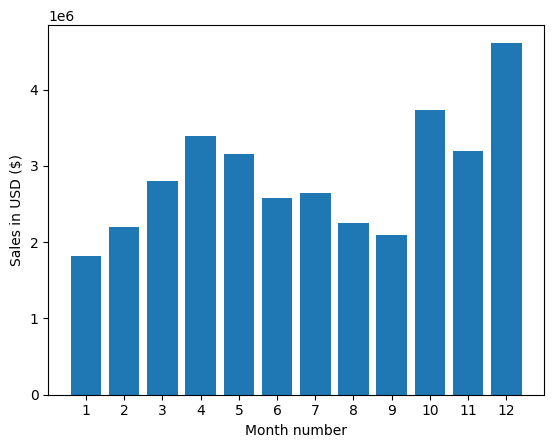

Max sale is in month: December
Sale is: 4613443.34


In [17]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
sum = all_data.groupby(['Month']).sum()
print(sum)

#Graph Plotting
months = range(1,13)

sales = list(all_data.groupby(['Month']).sum()['Sales'])

monthly_sales = all_data.groupby('Month')['Sales'].sum().reset_index()
monthly_sales.to_csv("monthly_sales.csv",index = False)

print("\n\nPer month Sales =\n ", sales)

plt.bar(months,sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.savefig('most_sales.png')
plt.show()


#Finding Maximum Values
max_sales_month = sales.index(max(sales))
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
month_name = months[max_sales_month]

max_sale = max(sales)

print(f"Max sale is in month: {month_name}\nSale is: {max_sale}")

**What city sold the most product**

                                                              Order ID  \
City                                                                     
Atlanta  (GA)        1448571416471455041471761472161495521464941430...   
Austin  (TX)         3007591502261472961501251454511461241466651448...   
Boston  (MA)         1421121458141425841465501450691453931479771461...   
Dallas  (TX)         1500381466471418541465751493921421991476811434...   
Los Angeles  (CA)    1501471448361473451499521420291418141442801480...   
New York City  (NY)  1482751488381430421499441474991426921499201475...   
Portland  (ME)       1451671443911522981537851559081664681700001690...   
Portland  (OR)       1431081447891442791463251478651494781500691440...   
San Francisco  (CA)  3193661419811492011468821465351452841487151456...   
Seattle  (WA)        1495711439381433711467861450291444361415981444...   

                                                               Product  \
City                                 

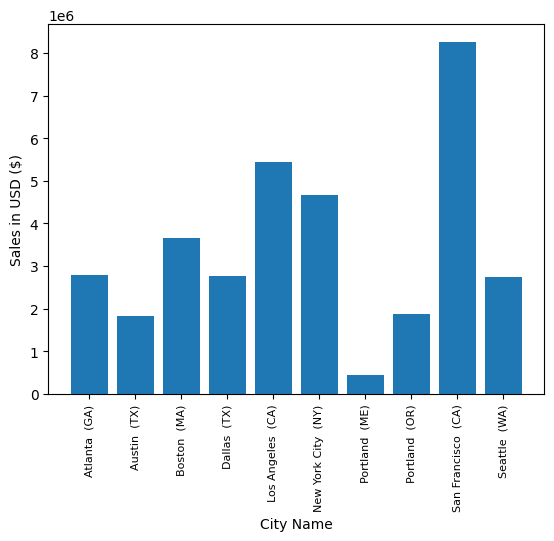

Most products are sold in: San Francisco  (CA) 
Sales is: 8262203.91


In [19]:
res=all_data.groupby(['City']).sum()
print(res)

# Graph Plotting
cities=res.index
sales = res['Sales']
print(sales)

sales_data = pd.DataFrame({'City': cities,'Sales':sales})
sales_data.to_csv("city_sales.csv",index = False)

plt.bar(cities,sales)
plt.xticks(cities,rotation = 'vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.savefig('city_sales.png')
plt.show()


#Finding Maximum Values
max_sales_city = res['Sales'].idxmax()
max_sales_value = res['Sales'].max()

print(f"Most products are sold in: {max_sales_city} \nSales is: {max_sales_value}")

**Best Time to Display Advertisement**

C:\Users\U6074533\AppData\Local\Temp\ipykernel_16156\4169091949.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour+1
C:\Users\U6074533\AppData\Local\Temp\ipykernel_16156\4169091949.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute


      Order ID       Product  Quantity Ordered  Price Each      Order Date  \
76787   150038  20in Monitor                 1      109.99  01/01/19 12:50   
68465   142112  20in Monitor                 1      109.99  01/01/19 13:51   
71369   144857  20in Monitor                 1      109.99  01/01/19 14:29   
67971   141647  20in Monitor                 1      109.99  01/01/19 14:36   
35749   300759  20in Monitor                 1      109.99  01/01/20 00:14   

                       Purchase Address  Month  Month 2           City  \
76787     191 13th St, Dallas, TX 75001      1        1   Dallas  (TX)   
68465      625 Elm St, Boston, MA 02215      1        1   Boston  (MA)   
71369     654 6th St, Atlanta, GA 30301      1        1  Atlanta  (GA)   
67971  434 Sunset St, Atlanta, GA 30301      1        1  Atlanta  (GA)   
35749      193 5th St, Austin, TX 73301      1        1   Austin  (TX)   

        Sales  Hour  Minute  Count  
76787  109.99    13      50      1  
68465  109.9

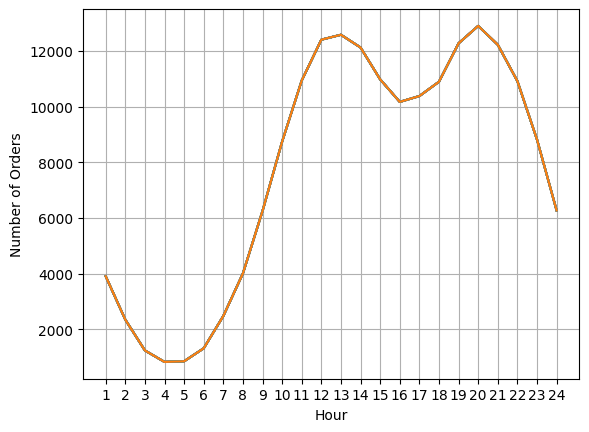

Best hour to display ad is: 8 PM 
No of orders placed at that time are: 12905


In [24]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour+1
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
print(all_data.head())

# Graph Plotting
no_of_orders = all_data.groupby(['Hour']).count()
print("no_of_orders: \n", no_of_orders)


hours=[hour for hour, df in all_data.groupby('Hour')]

hourly_counts = all_data.groupby('Hour')['Count'].count().reset_index()

# Save the hourly counts to a CSV file
hourly_counts.to_csv('hourly_counts.csv', index=False)

plt.plot(hours,no_of_orders )
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.savefig('advertise.png')
plt.show()

#Finding Maximum Values
max_sales_count = max(no_of_orders['Count'])
hour_with_max_count = no_of_orders['Count'].idxmax()
# Convert to 12-hour format with AM/PM
if hour_with_max_count == 0:
    time_12hr = "12 AM"
elif 1 <= hour_with_max_count < 12:
    time_12hr = f"{hour_with_max_count} AM"
elif hour_with_max_count == 12:
    time_12hr = "12 PM"
else:
    time_12hr = f"{hour_with_max_count - 12} PM"

print(f"Best hour to display ad is: {time_12hr} \nNo of orders placed at that time are: {max_sales_count}")

**what products are most often sold together**

In [21]:
df=all_data[all_data['Order ID'].duplicated(keep=False)].copy()
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
# print(df.head())

from itertools import combinations
from collections import Counter

count=Counter()
for row in df['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print("\nProducts sold together: ",key,"\nUnit sold: ", value)


Products sold together:  ('Lightning Charging Cable', 'iPhone') 
Unit sold:  1015

Products sold together:  ('Google Phone', 'USB-C Charging Cable') 
Unit sold:  999

Products sold together:  ('Wired Headphones', 'iPhone') 
Unit sold:  462

Products sold together:  ('Google Phone', 'Wired Headphones') 
Unit sold:  423

Products sold together:  ('Apple Airpods Headphones', 'iPhone') 
Unit sold:  373

Products sold together:  ('USB-C Charging Cable', 'Vareebadd Phone') 
Unit sold:  368

Products sold together:  ('Bose SoundSport Headphones', 'Google Phone') 
Unit sold:  228

Products sold together:  ('USB-C Charging Cable', 'Wired Headphones') 
Unit sold:  205

Products sold together:  ('Vareebadd Phone', 'Wired Headphones') 
Unit sold:  149

Products sold together:  ('Lightning Charging Cable', 'Wired Headphones') 
Unit sold:  129


**what product sold the most**

                                                                     Order ID  \
Product                                                                         
20in Monitor                1500381421121448571416473007593193661501471482...   
27in 4K Gaming Monitor      1499291436991449021447521415581448561420663153...   
27in FHD Monitor            1421931451651462431413331436101431301472131416...   
34in Ultrawide Monitor      1460391421561499961422941415331481331448581479...   
AA Batteries (4-pack)       1434981413641493781425341465491465901494921495...   
AAA Batteries (4-pack)      1499641424511413161427891450821459901503941475...   
Apple Airpods Headphones    1493431437631445051457691435401453191444601420...   
Bose SoundSport Headphones  1445371412421413191492981421121488291502081434...   
Flatscreen TV               1424391479631468441480721468571470451503111443...   
Google Phone                1452701421341475741480741446791474511438971471...   
LG Dryer                    

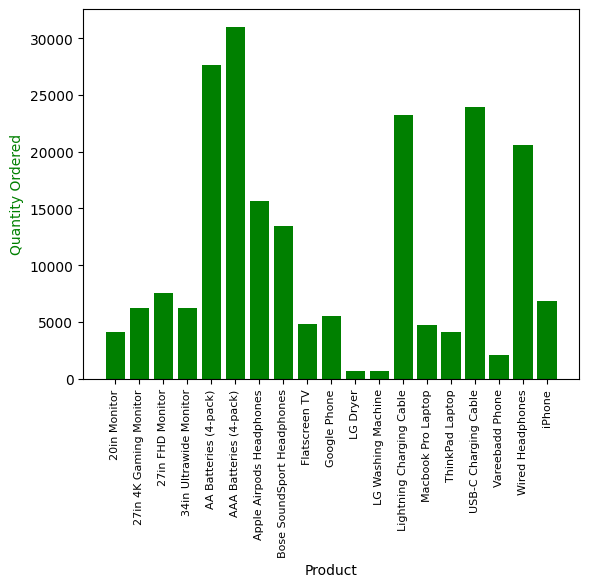

C:\Users\U6074533\AppData\Local\Temp\ipykernel_16156\1412627706.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products,rotation='vertical',size=8)


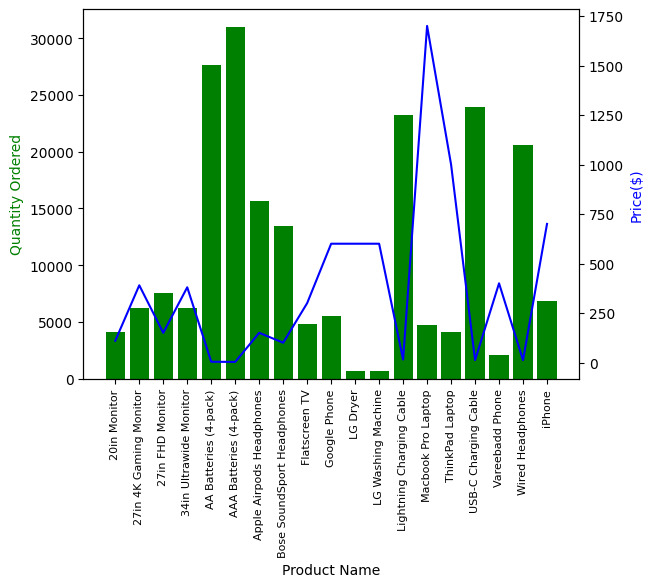

Top 3 most sold products and their quantities
Product: AAA Batteries (4-pack), Quantity Ordered: 31017, Price: $2.99
Product: AA Batteries (4-pack), Quantity Ordered: 27635, Price: $3.84
Product: USB-C Charging Cable, Quantity Ordered: 23975, Price: $11.95


Least sold products and their quantities
Product: LG Dryer, Quantity Ordered: 646, Price: $600.00
Product: LG Washing Machine, Quantity Ordered: 666, Price: $600.00
Product: Vareebadd Phone, Quantity Ordered: 2068, Price: $400.00


In [22]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']

products = list(product_group.groups.keys())

print(product_group.sum())

plt.bar(products,quantity_ordered,color ='g')
plt.ylabel('Quantity Ordered',color='g')
plt.xlabel('Product')
plt.xticks(rotation='vertical',size=8)
plt.savefig('prod_quant.png')
plt.show()

prices=product_group['Price Each'].mean()

# Plot for quantity ordered and prices for each product 
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')
ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price($)',color='b')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.savefig('quant_order_price.png')
plt.show()

product_quantity_data = pd.DataFrame({'Product': products, 'Quantity Ordered': quantity_ordered, 'Price': prices})
# Save the product-wise quantity ordered data to a CSV file
product_quantity_data.to_csv('product_quantity_ordered.csv', index=False)

# Get the top 3 most sold products and their quantities
top_3_products = product_group.sum().sort_values(by='Quantity Ordered', ascending=False).head(3)
print("Top 3 most sold products and their quantities")

for product_name1, data in top_3_products.iterrows():
    quantity_most = data['Quantity Ordered']
    price1 = prices[product_name1]
    print(f"Product: {product_name1}, Quantity Ordered: {quantity_most}, Price: ${price1:.2f}")

# Get the least sold products and their quantities
least_3_products = product_group.sum().sort_values(by='Quantity Ordered', ascending=True).head(3)
print("\n\nLeast sold products and their quantities")

for product_name2, data in least_3_products.iterrows():
    quantity_least = data['Quantity Ordered']
    price2 = prices[product_name2]
    print(f"Product: {product_name2}, Quantity Ordered: {quantity_least}, Price: ${price2:.2f}")

# Result

**We can interpret from the above graph that the products which have the maximum sales, have the lowest price and the ones with least quantity sold are prefered less due to their high price.**

In [23]:
from tabulate import tabulate

top_1_product = product_group.sum().sort_values(by='Quantity Ordered', ascending=False).head(1)
for product_name1, data in top_1_product.iterrows():
    quantity_most = data['Quantity Ordered']
    price1 = prices[product_name1]


least_1_product = product_group.sum().sort_values(by='Quantity Ordered', ascending=True).head(1)
for product_name2, data in least_1_product.iterrows():
    quantity_least = data['Quantity Ordered']
    price2 = prices[product_name2]

# Defining data
data = [
    ["Maximum sale month", f"{month_name}","NA", f"${max_sale:.2f}"],
    ["City with most product sold", f"{max_sales_city}","NA", f"${max_sales_value:.2f}"],
    ["Best Time to Display Advertisement", f"{time_12hr}",f"{max_sales_count} orders","NA"],
    ["Most sold products", f"{product_name1}", f"{quantity_most} items", f"${price1:.2f}/product"],
    ["Least sold product", f"{product_name2}", f"{quantity_least} items", f"${price2:.2f}/product"],
]

# Printing the table
table = tabulate(data, headers=["Metric", "Value", "Order count","Price"], tablefmt="grid")
print(table)


+------------------------------------+------------------------+---------------+-----------------+
| Metric                             | Value                  | Order count   | Price           |
+====================================+========================+===============+=================+
| Maximum sale month                 | December               | NA            | $4613443.34     |
+------------------------------------+------------------------+---------------+-----------------+
| City with most product sold        | San Francisco  (CA)    | NA            | $8262203.91     |
+------------------------------------+------------------------+---------------+-----------------+
| Best Time to Display Advertisement | 7 PM                   | 12905 orders  | NA              |
+------------------------------------+------------------------+---------------+-----------------+
| Most sold products                 | AAA Batteries (4-pack) | 31017 items   | $2.99/product   |
+-------------------